In [17]:
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import pandas as pd
from pathlib import Path
import numpy as np
import csv

dir_path= Path('..', 'data')
data_path= Path(dir_path,'gh_DS.csv' )
data_file= pd.read_csv(data_path)
print(data_file.columns)
data_file=data_file.drop(columns=[' id', ' who CH' ,' Time', ' Dist_To_CH', 'Rank', ' dist_CH_To_BS', ' send_code '])

x= data_file.values
print(x.shape)

shp= int(x.shape[0])

y=np.empty((shp, 1), dtype=str)
count=0
for a in x:
    if a[11] =='Normal':
        y[count]='N'
    else:
        y[count]='A'
    count=count+1
    
print(x.shape )
print (y.shape)
xtrain, xtest, ytrain, ytest = train_test_split(data_file.values,y,train_size=0.6, stratify= data_file['Attack type'])
        
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)
#print(ytrain)
myfile= open('tt_GHbasic.csv', 'w')
#print(xtrain)
with myfile:
    writer= csv.writer(myfile)
    writer.writerow(data_file.columns)
    writer.writerows(xtrain)
    writer.writerows(xtest)

ys= open('labels_GHbasic.csv', 'w')
with ys:
    writer=csv.writer(ys)
    writer.writerows(ytrain)
    writer.writerows(ytest)

Index([' id', ' Time', ' Is_CH', ' who CH', ' Dist_To_CH', ' ADV_S', ' ADV_R',
       ' JOIN_S', ' JOIN_R', ' SCH_S', ' SCH_R', 'Rank', ' DATA_S', ' DATA_R',
       ' Data_Sent_To_BS', ' dist_CH_To_BS', ' send_code ', 'Consumed Energy',
       'Attack type'],
      dtype='object')
(360065, 12)
(360065, 12)
(360065, 1)
(216039, 12)
(144026, 12)
(216039, 1)
(144026, 1)


In [18]:
data_path= Path('tt_GHbasic.csv' )
data_file= pd.read_csv(data_path)
data_file=data_file.drop(columns=['Attack type'])

print(data_file.columns)
allx= data_file.values
print(allx.shape)
xtrain= allx[0:ytrain.shape[0]]
xtest= allx[ytrain.shape[0]: ytrain.shape[0]+ytest.shape[0]]
print(xtrain.shape)
print(xtest.shape)

Index([' Is_CH', ' ADV_S', ' ADV_R', ' JOIN_S', ' JOIN_R', ' SCH_S', ' SCH_R',
       ' DATA_S', ' DATA_R', ' Data_Sent_To_BS', 'Consumed Energy'],
      dtype='object')
(360065, 11)
(216039, 11)
(144026, 11)


In [19]:
cls=DecisionTreeClassifier()

cls=cls.fit(xtrain,ytrain)

y_pred=cls.predict(xtest)
print("Accuracy:", metrics.accuracy_score(ytest, y_pred))
print(metrics.confusion_matrix(ytest, y_pred).ravel())
#tn, fp, fn, tp 
print(metrics.classification_report(ytest, y_pred))

Accuracy: 0.9956327329787678
[  7706    294    335 135691]
              precision    recall  f1-score   support

           A       0.96      0.96      0.96      8000
           N       1.00      1.00      1.00    136026

    accuracy                           1.00    144026
   macro avg       0.98      0.98      0.98    144026
weighted avg       1.00      1.00      1.00    144026



In [24]:
dir_path= Path('..', 'data')
data_path= Path(dir_path,'grayhole1.csv' )
data_file= pd.read_csv(data_path)
print(data_file.columns)
data_file=data_file.drop(columns=[' id', ' who CH' ,' Time', ' Dist_To_CH', 'Rank', ' dist_CH_To_BS', ' send_code ','Attack type' ])
data_dump=data_file.values

x_blk=data_dump

x_btest= np.concatenate((xtest, data_dump), 0)
y_blk=np.empty((data_dump.shape[0], 1), dtype=str)
count=0
for a in y_blk:
    y_blk[count]='A'
    count=count+1
    
y_btest= np.concatenate((ytest, y_blk),0)

print(x_blk.shape)

Index([' id', ' Time', ' Is_CH', ' who CH', ' Dist_To_CH', ' ADV_S', ' ADV_R',
       ' JOIN_S', ' JOIN_R', ' SCH_S', ' SCH_R', 'Rank', ' DATA_S', ' DATA_R',
       ' Data_Sent_To_BS', ' dist_CH_To_BS', ' send_code ', 'Consumed Energy',
       'Attack type'],
      dtype='object')
(14596, 11)


In [25]:
myfile= open('test_wt_grayhole.csv', 'w')
#print(xtrain)
with myfile:
    writer= csv.writer(myfile)
    writer.writerow(data_file.columns)
    writer.writerows(x_btest)

ys= open('labels_wt_grayhole.csv', 'w')
with ys:
    writer=csv.writer(ys)
    writer.writerows(ytrain)
    writer.writerows(y_blk)

In [26]:
y_bh_only=cls.predict(x_blk)

print("Accuracy:", metrics.accuracy_score(y_blk, y_bh_only))
print(metrics.confusion_matrix(y_blk, y_bh_only).ravel())
#tn, fp, fn, tp 
print(metrics.classification_report(y_blk, y_bh_only))

Accuracy: 0.3696903261167443
[5396 9200    0    0]
              precision    recall  f1-score   support

           A       1.00      0.37      0.54     14596
           N       0.00      0.00      0.00         0

    accuracy                           0.37     14596
   macro avg       0.50      0.18      0.27     14596
weighted avg       1.00      0.37      0.54     14596



C:\Users\Amy\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


300


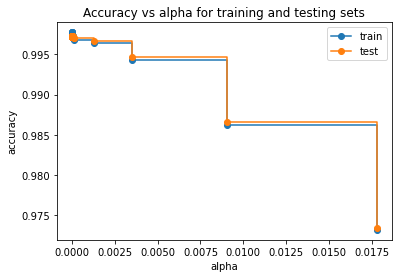

In [35]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(xtrain, ytrain)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


clfs=[]
print(ccp_alphas.size)
#print(ccp_alphas)
a_section= ccp_alphas[250:300]
for ccp_alpha in a_section:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(xtrain, ytrain)
    clfs.append(clf)
    
clfs = clfs[:-1]
a_section = a_section[:-1]


train_scores = [clf.score(xtrain, ytrain) for clf in clfs]
test_scores = [clf.score(xtest, ytest) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(a_section, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(a_section, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()


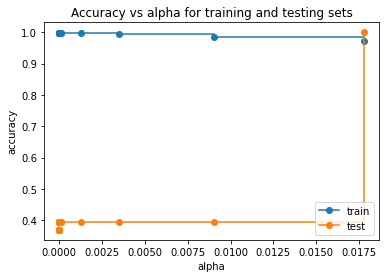

In [36]:
test_scores = [clf.score(x_blk, y_blk) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(a_section, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(a_section, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [37]:
KO= clfs[-1]

y_pred=KO.predict(x_btest)
print("Accuracy:", metrics.accuracy_score(y_btest, y_pred))
print(metrics.classification_report(y_btest, y_pred))

print(metrics.confusion_matrix(y_btest, y_pred).ravel())
#tn, fp, fn, tp      

Accuracy: 0.975886068767258
              precision    recall  f1-score   support

           A       0.86      0.99      0.92     22596
           N       1.00      0.97      0.99    136026

    accuracy                           0.98    158622
   macro avg       0.93      0.98      0.95    158622
weighted avg       0.98      0.98      0.98    158622

[ 22440    156   3669 132357]


In [39]:
y_pred=KO.predict(x_blk)
print("Accuracy:", metrics.accuracy_score(y_blk, y_pred))
print(metrics.classification_report(y_blk, y_pred))

print(metrics.confusion_matrix(y_blk, y_pred).ravel())
#tn, fp, fn, tp      

Accuracy: 1.0
              precision    recall  f1-score   support

           A       1.00      1.00      1.00     14596

    accuracy                           1.00     14596
   macro avg       1.00      1.00      1.00     14596
weighted avg       1.00      1.00      1.00     14596

[14596]


In [17]:

print(metrics.confusion_matrix(y_blk, y_pred).ravel())
#tn, fp, fn, tp      

[ 43373 331288      0      0]
